In [1]:
import pandas as pd

from lets_plot import *
from lets_plot import tilesets
from lets_plot.geo_data import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



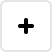
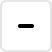
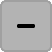
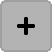
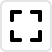
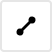
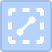
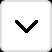
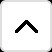
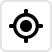
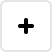
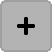
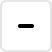
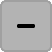
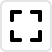
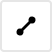
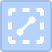
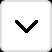
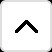
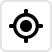

In [2]:
LetsPlot.setup_html()

In [3]:
plot_side = 600
colors = dict(
    light=dict(
        color1="#474747",
        color2="#8045e5",
        background="white",
    ),
    dark=dict(
        color1="white",
        color2="#8045e5",
        background="#14181e",
    ),
)

## Charts

In [4]:
charts_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/penguins.csv")
charts_df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female

In [5]:
def charts_plot1(theme_type):
    return ggplot(charts_df) + \
        geom_ydotplot(aes("species", "body_mass_g"), \
                      dotsize=.5, stackratio=1.2, stroke=.3, \
                      color=colors[theme_type]["color1"], \
                      fill=colors[theme_type]["color2"], \
                      tooltips='none') + \
        scale_y_continuous(name="body mass (g)") + \
        ggsize(plot_side, plot_side) + \
        theme(plot_background=element_rect(fill=colors[theme_type]["background"]), \
              panel_grid_major=element_line(color=None if theme_type == 'light' else "#333333"), \
              axis_line=element_line(color=colors[theme_type]["color1"]), \
              axis_ticks=element_line(color=colors[theme_type]["color1"]), \
              text=element_text(color=colors[theme_type]["color1"]))

In [6]:
def charts_plot2(theme_type):
    if theme_type == 'dark':
        bg_color = "#141414"
        grid_color = "#333333"
    else:
        bg_color = "#d9d9d9"
        grid_color = "#c9c9c9"
    return ggplot(charts_df) + \
        geom_ydotplot(aes("species", "body_mass_g"), dotsize=.5, stackratio=1.2, stroke=0, \
                      fill="#9a5353", tooltips='none') + \
        scale_y_continuous(name="body mass (g)") + \
        ggsize(plot_side, plot_side) + \
        theme(plot_background=element_rect(fill=bg_color), \
              panel_grid_major=element_line(color=grid_color), \
              axis_line=element_line(color=colors[theme_type]["color1"]), \
              axis_ticks=element_line(color=colors[theme_type]["color1"]), \
              text=element_text(color=colors[theme_type]["color1"]))

In [7]:
charts_plot1('light')

In [8]:
charts_plot1('dark')

In [9]:
charts_plot2('light')

In [10]:
charts_plot2('dark')

## Maps

In [11]:
def get_maps_data1():
    import numpy as np
    n = 1000
    np.random.seed(42)
    x, y = np.random.multivariate_normal(mean=[5, 20], cov=[[50, 0], [0, 50]], size=n).T
    return pd.DataFrame(dict(x=x, y=y))

maps_df1 = get_maps_data1()
maps_df1.head()

x          y
0   8.512299  19.022324
1   9.579850  30.769447
2   3.344286  18.344402
3  16.166721  25.426583
4   1.680315  23.836479

In [12]:
def maps_plot1(theme_type):
    if theme_type == 'light':
        tiles = tilesets.LETS_PLOT_LIGHT
    elif theme_type == 'dark':
        tiles = tilesets.LETS_PLOT_DARK
    else:
        tiles = tilesets.LETS_PLOT_COLOR
    return ggplot() + \
        geom_livemap(location=[18, 5], zoom=3, tiles=tiles) + \
        geom_density2df(aes("x", "y", color='..level..', fill='..level..'), \
                        data=maps_df1, alpha=.5, size=.2) + \
        scale_gradient(['color', 'fill'], low=colors[theme_type]["color1"], \
                       high=colors[theme_type]["color2"], guide='none') + \
        ggsize(plot_side, plot_side) + \
        theme(plot_margin=0)

In [13]:
maps_state_gdf2 = geocode_states("California").inc_res(2).get_boundaries()
maps_state_gdf2

state  found name                                           geometry
0  California  California  MULTIPOLYGON (((-124.32694 40.61620, -124.3118...

In [14]:
def get_maps_county_data2():
    states = ["California", "Nevada", "Oregon", "Idaho", "Utah", "Arizona"]
    return pd.concat([geocode_counties().scope(state).inc_res(2).get_boundaries() for state in states])

maps_counties_gdf2 = get_maps_county_data2()
maps_counties_gdf2.head()

county           found name  \
0      Humboldt County      Humboldt County   
1        Tulare County        Tulare County   
2    Sacramento County    Sacramento County   
3         Marin County         Marin County   
4  Contra Costa County  Contra Costa County   

                                            geometry  
0  MULTIPOLYGON (((-124.12151 40.97252, -124.1129...  
1  MULTIPOLYGON (((-119.57338 36.48875, -119.4663...  
2  MULTIPOLYGON (((-121.70842 38.09103, -121.7079...  
3  MULTIPOLYGON (((-122.70971 37.89590, -122.8234...  
4  MULTIPOLYGON (((-122.31363 37.89706, -122.3907...

In [15]:
def get_maps_data2():
    from sklearn.datasets import fetch_california_housing
    california_housing_bunch = fetch_california_housing()
    df = pd.DataFrame(california_housing_bunch.data, columns=california_housing_bunch.feature_names)
    df["Value"] = california_housing_bunch.target
    return df.sample(n=1000).reset_index(drop=True)

maps_df2 = get_maps_data2()
maps_df2.head()

MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.7248      39.0   7.679775   1.171348      1782.0  2.502809     36.55   
1  2.5096      33.0   4.559322   0.940678       656.0  2.779661     40.78   
2  1.6410      34.0   4.904382   1.101594      2334.0  4.649402     33.90   
3  3.5417      17.0   6.150943   1.161725       974.0  2.625337     39.30   
4  3.9722      17.0  20.900783   3.608355       999.0  2.608355     38.93   

   Longitude  Value  
0    -121.91  3.988  
1    -124.18  0.722  
2    -118.23  0.968  
3    -120.89  1.551  
4    -120.00  3.134

In [16]:
def maps_plot2(theme_type):
    state_border_color = "#7c334f"
    if theme_type == 'light':
        tiles = tilesets.LETS_PLOT_LIGHT
        county_border_color = "#dddddd"
        fill_color = "white"
    elif theme_type == 'dark':
        tiles = tilesets.LETS_PLOT_DARK
        county_border_color = "#333333"
        fill_color = "black"
    else:
        tiles = tilesets.LETS_PLOT_COLOR
        county_border_color = "#dddddd"
        fill_color = "white"
    return ggplot() + \
        geom_livemap(tiles=tiles, location=[-119.3, 37.4], zoom=6) + \
        geom_polygon(data=maps_state_gdf2, fill=fill_color, color=state_border_color, alpha=.5, size=.7) + \
        geom_polygon(data=maps_counties_gdf2, color=county_border_color, alpha=0, size=.1) + \
        geom_point(aes(x="Longitude", y="Latitude", size="Value", color="HouseAge"), \
                   data=maps_df2, alpha=.8, tooltips='none') + \
        scale_color_viridis(option='twilight', direction=-1, guide='none') + \
        scale_size(range=[5, 15], guide='none') + \
        ggsize(plot_side, plot_side) + \
        theme_void() + theme(plot_margin=0)

In [17]:
maps_plot1('light')

In [18]:
maps_plot1('dark')

In [19]:
maps_plot2('light')

In [20]:
maps_plot2('dark')

## Geocoding

In [21]:
country = "Ireland"
delta = 4
ratio = 1.7
xmin = -10.25 - (ratio - 1) * delta / 2
xmax = xmin + ratio * delta
ymin = 51.4
ymax = ymin + delta

In [22]:
geocoding_country_gdf = geocode_countries(names=country).inc_res(4).get_boundaries()
geocoding_country_gdf

country found name                                           geometry
0  Ireland    Ireland  MULTIPOLYGON (((-10.65036 52.07708, -10.65695 ...

In [23]:
geocoding_counties_gdf = geocode_counties().scope(country).get_boundaries()
geocoding_counties_gdf.head()

county        found name  \
0    County Wicklow    County Wicklow   
1     County Dublin     County Dublin   
2      County Meath      County Meath   
3  County Waterford  County Waterford   
4   County Monaghan   County Monaghan   

                                            geometry  
0  MULTIPOLYGON (((-6.73725 52.91578, -6.77737 53...  
1  MULTIPOLYGON (((-6.47524 53.23431, -6.46013 53...  
2  MULTIPOLYGON (((-7.34362 53.79906, -7.00216 53...  
3  MULTIPOLYGON (((-8.10477 52.20645, -7.37209 52...  
4  MULTIPOLYGON (((-7.31991 54.11347, -7.33956 54...

In [24]:
def geocoding_plot1(theme_type):
    return ggplot() + \
        geom_map(data=geocoding_country_gdf, fill=colors[theme_type]["color1"], size=0) + \
        geom_rect(data=geocoding_counties_gdf, color=colors[theme_type]["color2"], size=2, alpha=0) + \
        geom_rect(data=geocoding_counties_gdf, color=colors[theme_type]["background"], size=1, alpha=0) + \
        coord_fixed(ratio=ratio, xlim=[xmin, xmax], ylim=[ymin, ymax]) + \
        ggsize(plot_side, plot_side) + \
        theme_void() + theme(plot_background=element_rect(fill=colors[theme_type]["background"]))

In [25]:
def geocoding_plot2(theme_type):
    if theme_type == 'dark':
        bg_color = "#141414"
        map_color = "#3d3d3d"
    else:
        bg_color = "#d9d9d9"
        map_color = "#f7f4f0"
    return ggplot() + \
        geom_map(data=geocoding_country_gdf, fill=map_color, size=0) + \
        geom_rect(data=geocoding_counties_gdf, color="#9a5353", size=2, alpha=0) + \
        geom_rect(data=geocoding_counties_gdf, color="white", size=1, alpha=0) + \
        coord_fixed(ratio=ratio, xlim=[xmin, xmax], ylim=[ymin, ymax]) + \
        ggsize(plot_side, plot_side) + \
        theme_void() + theme(plot_background=element_rect(fill=bg_color))

In [26]:
geocoding_plot1('light')

In [27]:
geocoding_plot1('dark')

In [28]:
geocoding_plot2('light')

In [29]:
geocoding_plot2('dark')